# Predicting car prices

##### Introduction to the dataset

In [1]:
import pandas as pd

In [2]:
cars= pd.read_csv("imports-85.data")

In [3]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### i think this is because the file have just data not names columns linked to them, that's the reason for the column names on documentation don't match with them of the cars dataframe

### To fix this, we have need to rename all column names of the cars dataframe 

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
3              204 non-null int64
?              204 non-null object
alfa-romero    204 non-null object
gas            204 non-null object
std            204 non-null object
two            204 non-null object
convertible    204 non-null object
rwd            204 non-null object
front          204 non-null object
88.60          204 non-null float64
168.80         204 non-null float64
64.10          204 non-null float64
48.80          204 non-null float64
2548           204 non-null int64
dohc           204 non-null object
four           204 non-null object
130            204 non-null int64
mpfi           204 non-null object
3.47           204 non-null object
2.68           204 non-null object
9.00           204 non-null float64
111            204 non-null object
5000           204 non-null object
21             204 non-null int64
27             204 non-null int64
13495          204 n

### We have ten numeric columns.

### For get the same preview dataframe, we have need to reread into a new dataframe with column names

In [5]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars= pd.read_csv("imports-85.data", names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
import numpy as np

cars= cars.replace("?",np.nan)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-nul

In [8]:
cols= ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df_continous_cols= cars[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]

In [9]:
df_continous_cols = df_continous_cols.astype('float')
df_continous_cols.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### what's can we do with this missing values

### Let's delete missing values of the price column 

In [10]:
df_continous_cols= df_continous_cols.dropna(subset=["price"])

In [11]:
df_continous_cols.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [12]:
df_continous_cols["normalized-losses"].shape

(201,)

### As we have just 41 on 205 values of "normalized-losses" column we can to replace them by the average, and all others columns also.

In [13]:
df_continous_cols= df_continous_cols.fillna(df_continous_cols.mean())

In [14]:
df_continous_cols.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


### we have delete all missing values now let's normalize columns whose range be from 0 to 1

In [15]:
col_price= df_continous_cols["price"]
df_continous_cols= (df_continous_cols - df_continous_cols.min())/(df_continous_cols.max()-df_continous_cols.min())
df_continous_cols["price"]= col_price
df_continous_cols.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### Now let's build our models

### let's start with univariate k-nearest neighbors model

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(cols_train,col_target,obj):
    
    #create object knn
    knn= KNeighborsRegressor(algorithm="brute")
    
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(obj.index)
    rand_df = obj.reindex(shuffled_index)
    
    #split dataframe
    lenght= len(rand_df)//3
    df_train= rand_df.iloc[:(2*lenght)]
    df_test= rand_df.iloc[(2*lenght):]
    
    #fit the model
    knn.fit(df_train[[cols_train]],df_train[col_target])
    
    #make prediction
    predictions= knn.predict(df_test[[cols_train]])
    
    #let's return root mean squared error
    rmse= mean_squared_error(predictions,df_test[col_target])**(1/2)
    return rmse

cols_perf= ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

dict_error= {}

for col in cols_perf:
    col_rmse= knn_train_test(col,"price",df_continous_cols)
    dict_error[col]= col_rmse
serie_error= pd.Series(dict_error)
serie_error.sort_values()

engine-size          3100.388333
horsepower           4374.499866
width                4686.019771
city-mpg             4694.863883
curb-weight          4814.172468
length               5159.359891
wheel-base           5209.290486
highway-mpg          5294.025858
compression-rate     5664.506854
normalized-losses    6978.191059
bore                 7403.610139
peak-rpm             7443.914409
stroke               7509.061174
height               7664.869067
dtype: float64

### Results we get, show us the "engine-size" column make better performing with most weak error

### Now let's use hyper-params for perfom our models

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#let's modify our function by adding k param
def knn_train_test(cols_train,col_target,obj):
    
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(obj.index)
    rand_df = obj.reindex(shuffled_index)
    
    #split dataframe
    lenght= len(rand_df)//3
    df_train= rand_df.iloc[:(2*lenght)]
    df_test= rand_df.iloc[(2*lenght):]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    for k in k_values:
        #create object knn
        knn= KNeighborsRegressor(n_neighbors= k,algorithm="auto")

        #fit the model
        knn.fit(df_train[[cols_train]],df_train[col_target])

        #make prediction
        predictions= knn.predict(df_test[[cols_train]])

        #let's return root mean squared error
        rmse= mean_squared_error(predictions,df_test[col_target])**(1/2)
        k_rmses[k]= rmse
    return k_rmses

cols_perf= ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

dict_error= {}

for col in cols_perf:
    col_rmse= knn_train_test(col,"price",df_continous_cols)
    dict_error[col]= col_rmse
dict_error

{'bore': {1: 11692.85503547346,
  3: 7780.230983879638,
  5: 7614.819011186958,
  7: 7729.481782831891,
  9: 7717.393341216173},
 'city-mpg': {1: 5266.072820919198,
  3: 5029.592472174319,
  5: 4887.681857761057,
  7: 4668.816265929471,
  9: 5265.444019168526},
 'compression-rate': {1: 8220.65287653103,
  3: 5637.92873429022,
  5: 5750.318548528615,
  7: 5677.565378529328,
  9: 6153.934348925597},
 'curb-weight': {1: 5803.260608189776,
  3: 5717.801154997686,
  5: 4819.870627235089,
  7: 4559.810831466951,
  9: 4714.404347112628},
 'engine-size': {1: 2966.915298430291,
  3: 2905.336174221576,
  5: 3092.3264727917003,
  7: 3519.6399122769076,
  9: 3692.3316987626013},
 'height': {1: 8801.82730010624,
  3: 7800.396128054044,
  5: 7854.182129590332,
  7: 7696.642802038746,
  9: 7805.99684082772},
 'highway-mpg': {1: 5402.232914516605,
  3: 4892.216988376525,
  5: 5036.329813094915,
  7: 5218.746184832105,
  9: 5341.667865612003},
 'horsepower': {1: 3635.4582888749055,
  3: 4171.1512473208

### Let's visualize the results

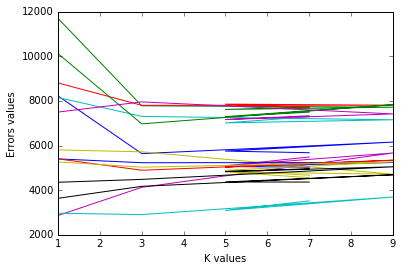

In [30]:
for k,v in dict_error.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel("K values")
    plt.ylabel("Errors values")
plt.show()

### Let's work with multiple columns

In [31]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in dict_error.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          3235.309911
horsepower           4245.281242
wheel-base           4647.630282
width                4735.329729
city-mpg             5023.521487
curb-weight          5123.029514
highway-mpg          5178.238753
length               5191.664285
compression-rate     6288.079977
peak-rpm             7382.583151
normalized-losses    7473.430161
stroke               7940.493149
height               7991.809040
bore                 8506.956031
dtype: float64


In [32]:
# let's modify train_test function 
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        df_continous_cols
    )

k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3281.8817933835726},
 '4 best features': {5: 3691.1392748226954},
 '5 best features': {5: 3677.9188643407115},
 '6 best features': {5: 3667.6737231392244}}

### Hyperparameter tuning

In [34]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        df_continous_cols
    )

k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3178.8085133201143,
  2: 3210.3390632439587,
  3: 3063.2583754210905,
  4: 3107.3017640863363,
  5: 3281.8817933835726,
  6: 3464.2579063717503,
  7: 3672.9346491541282,
  8: 3661.296551618337,
  9: 3858.55931346832,
  10: 4088.327532835716,
  11: 4186.96225149283,
  12: 4305.752029027978,
  13: 4349.208106731881,
  14: 4343.340834893357,
  15: 4449.990275

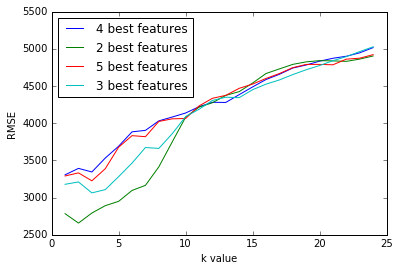

In [37]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc="upper left")